In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
plt.style.use("fivethirtyeight")
import datetime as dt
import yfinance as yf

In [2]:
company = 'AKSEN.IS'

# Bir başlangıç ​​tarihi ve Bitiş Tarihi tanımlayın
start = dt.datetime(2020,1,1)
end =  dt.datetime(2024,5,1)

# Hisse Senedi Fiyat Verilerini Oku
df = yf.download(company, start , end)

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-07,34.439999,34.759998,34.099998,34.200001,34.200001,6721749
2023-03-08,34.220001,34.580002,33.580002,34.080002,34.080002,8460669
2023-03-09,34.459999,35.279999,34.380001,35.200001,35.200001,10054053
2023-03-10,35.200001,35.200001,34.119999,34.439999,34.439999,8515011
2023-03-13,34.439999,34.939999,33.740002,33.900002,33.900002,7341511
2023-03-14,33.959999,34.160000,32.500000,32.959999,32.959999,8153725
2023-03-15,32.939999,33.000000,31.420000,31.900000,31.900000,7369421
2023-03-16,32.020000,32.779999,31.459999,32.700001,32.700001,6482835
2023-03-17,33.119999,33.439999,31.840000,31.840000,31.840000,10337463


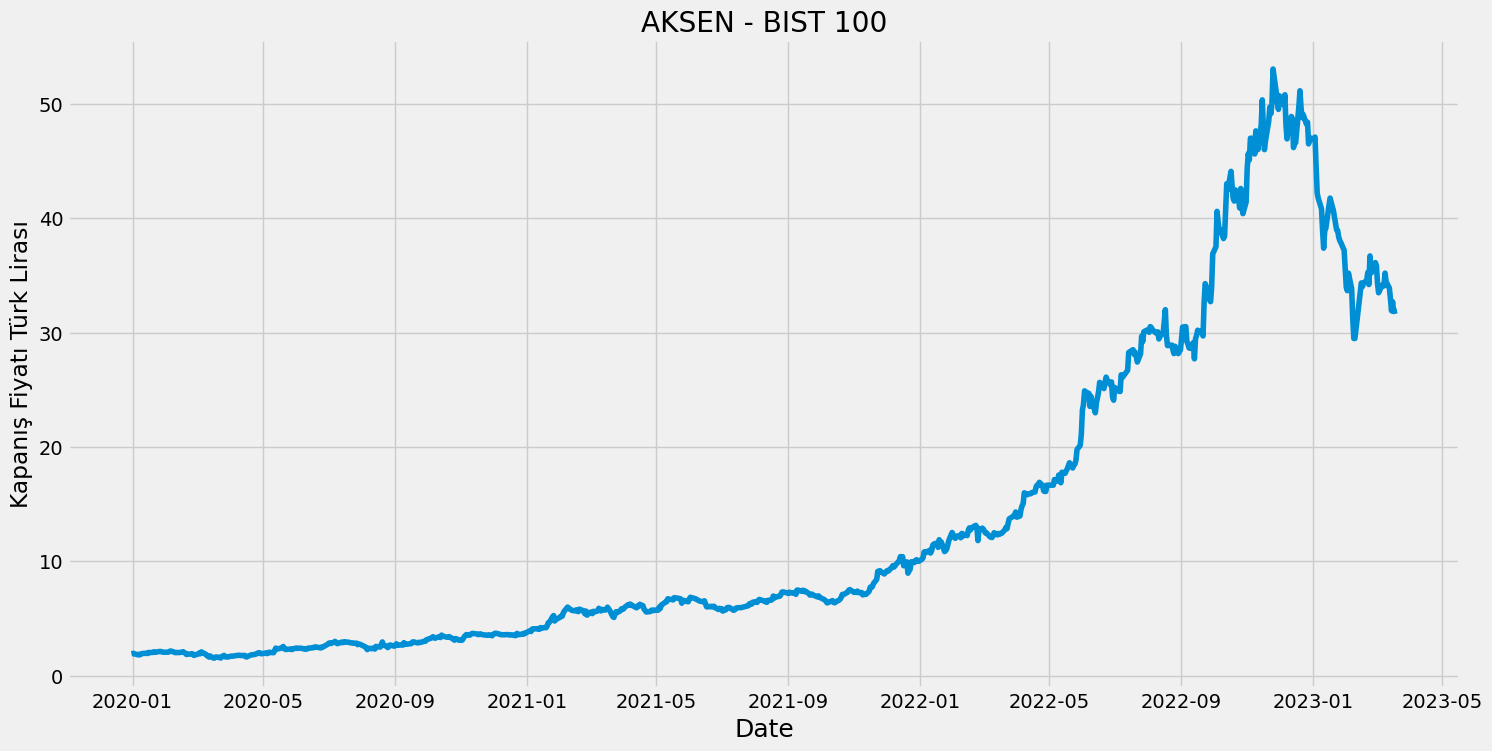

In [3]:
#Verileri filtrele
data = df.filter(["Close"])

#Görselleştirme
plt.figure(figsize=(16,8))
plt.plot(data["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası")
plt.title("AKSEN - BIST 100")
plt.show()

In [4]:
#Yalnızca Kapat sütunuyla yeni bir DataFrame oluştur
data = df.filter(["Close"])

#Veri çerçevesini bir numpy dizisine dönüştür
dataset = data.values

#Modeli eğitmek için satır sayısını al
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

646


In [5]:
#Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[7.47137582e-03],
       [8.15059349e-03],
       [7.18028353e-03],
       [5.72482206e-03],
       [6.40403741e-03],
       [5.62778898e-03],
       [7.08325276e-03],
       [7.76246811e-03],
       [8.24762425e-03],
       [8.15059349e-03],
       [7.85949888e-03],
       [9.60605727e-03],
       [9.41199574e-03],
       [9.70308572e-03],
       [1.08674549e-02],
       [9.89714725e-03],
       [1.00912088e-02],
       [1.06733934e-02],
       [1.14496395e-02],
       [1.07704264e-02],
       [1.01882419e-02],
       [9.99418033e-03],
       [1.00912088e-02],
       [1.00912088e-02],
       [1.06733934e-02],
       [1.20318287e-02],
       [1.19347956e-02],
       [1.12555780e-02],
       [9.21793190e-03],
       [9.50902419e-03],
       [9.50902419e-03],
       [9.60605727e-03],
       [9.50902419e-03],
       [1.08674549e-02],
       [9.50902419e-03],
       [8.34465502e-03],
       [6.20997588e-03],
       [6.59809894e-03],
       [6.98622200e-03],
       [7.56840658e-03],


In [6]:
#Eğitim veri setini oluştur
#Ölçeklendirilmiş eğitim veri setini oluştur

train_data = scaled_data[0:training_data_len,:]

#Verileri x_train ve y_train veri kümelerine ayırın
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00747138, 0.00815059, 0.00718028, 0.00572482, 0.00640404,
       0.00562779, 0.00708325, 0.00776247, 0.00824762, 0.00815059,
       0.0078595 , 0.00960606, 0.009412  , 0.00970309, 0.01086745,
       0.00989715, 0.01009121, 0.01067339, 0.01144964, 0.01077043,
       0.01018824, 0.00999418, 0.01009121, 0.01009121, 0.01067339,
       0.01203183, 0.0119348 , 0.01125558, 0.00921793, 0.00950902,
       0.00950902, 0.00960606, 0.00950902, 0.01086745, 0.00950902,
       0.00834466, 0.00620998, 0.0065981 , 0.00698622, 0.00756841,
       0.00698622, 0.00465748, 0.0053367 , 0.00718028, 0.00873278,
       0.00737435, 0.01067339, 0.009412  , 0.0065981 , 0.00436639,
       0.00397827, 0.00174656, 0.00368717, 0.00029109, 0.        ,
       0.00184359, 0.00174656, 0.00184359, 0.00019406, 0.00300796])]
[0.0033960813904871587]



In [7]:

#x_train ve y_train'i numpy dizilerine dönüştür
x_train,y_train = np.array(x_train),np.array(y_train)

In [8]:
#Verileri yeniden şekillendir
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(586, 60, 1)

In [9]:
#LSTM Modelini Oluşturun
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:

#Modeli derle
model.compile(optimizer="adam",loss="mean_squared_error")

In [11]:
#Modeli eğit
model.fit(x_train,y_train,batch_size=1, epochs=1)

586/586 [==============================] - 10s 12ms/step - loss: 9.1815e-04


In [12]:
#Test veri setini oluştur
#1543'ten 2003'e ölçeklenmiş değerler içeren yeni bir dizi oluştur

test_data = scaled_data[training_data_len - 60:, :]

#x_test ve y_test veri kümelerini oluştur

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [13]:

#Verileri bir numpy dizisine dönüştür
x_test = np.array(x_test)

In [14]:
#Verileri yeniden şekillendir
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [15]:
#Modellerin tahmin edilen fiyat değerlerini alın
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 1s 8ms/step


In [16]:
#Kök ortalama kare hatasını al (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

3.5389875447527963

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_15136\2282519986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


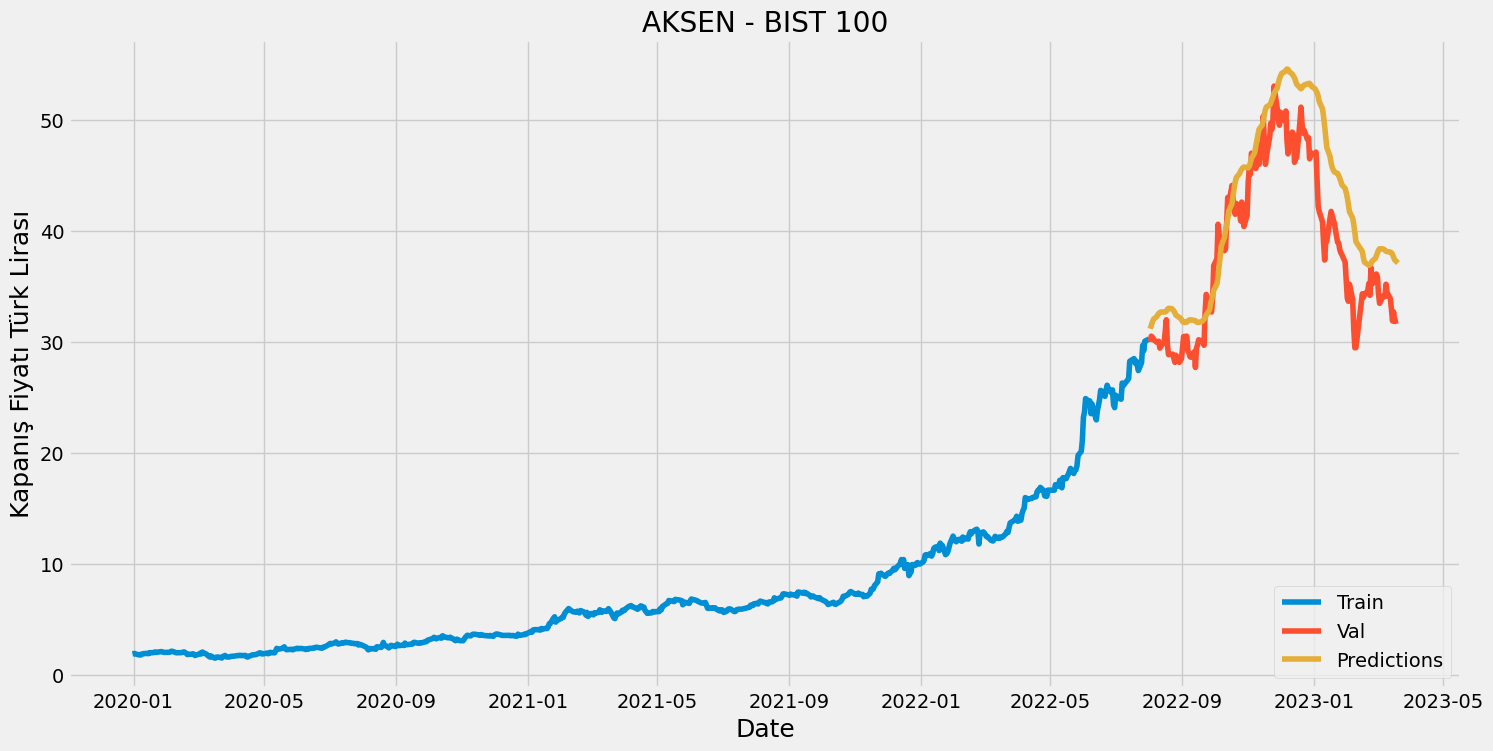

In [17]:
#Verileri çiz
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Verileri görselleştirin
plt.figure(figsize=(16,8))
plt.title("AKSEN - BIST 100")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"], loc="lower right")
plt.show()